# 微分積分の基本定理を理解する

石田　淳 (aishida@kwansei.ac.jp)

In [1]:
import sympy as sym
sym.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from ipywidgets import interact

## 関数

連続関数を考えてみる．

In [2]:
x = sym.symbols('x')
f = x**3 - 8*x**2 - 6*x + 150
f

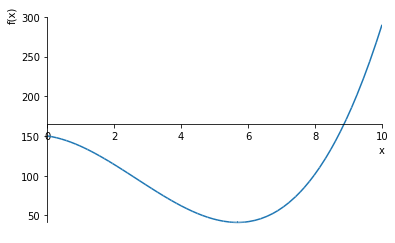

In [3]:
sym.plot(f, (x,0,10))

# 微分

$x$の1単位当たりの$f(x)$から$f(x+1)$の平均変化率
$$\frac{f (x+1)-f x}{x-x+1}=f (x+1)-f(x)$$
を考える．それは，直線$[f(x+1)-f(x)]x+f(x)$の傾きに等しい．

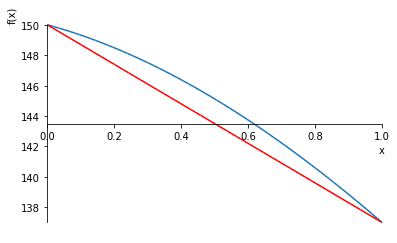

In [4]:
z = sym.symbols('z')
f_acr1 = f.subs(x,z + 1)-f.subs(x,z)
f_line = f_acr1.subs(z,0)*x + f.subs(x,0)
p = sym.plot(f,(x,0,1), show = False)
p.extend(sym.plot(f_line,(x,0,1),line_color = 'r', show = False))
p.show()

あとで`matplotlib`で使うために，関数を`lambdify`する．

In [5]:
f_lam = sym.lambdify(x,f,'numpy')
# f_lam(np.linspace(0,10,11))

$x$の各点で平均変化率をとってプロット

In [6]:
f_acr1_lam = sym.lambdify(z,f_acr1,'numpy')
# f_acr1_lam(np.linspace(0,10,11))

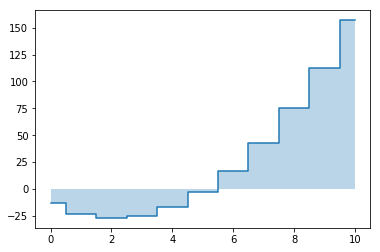

In [7]:
X = np.arange(11) # np.linspace(0,10,11)
Y = f_acr1_lam(X)

# plt.step(X, Y,where = "mid")
plt.fill_between(X,Y, step="mid", alpha=0.3)
plt.plot(X,Y, drawstyle="steps-mid")

plt.show()

一般に，$(f(x+h)-f(x))/h$の$h$を限りなく小さくしたものを$f(x)$の導関数$f'(x)$という．

In [8]:
fd = sym.diff(f,x)
fd_lam = sym.lambdify(x,fd,'numpy')
fd

In [9]:
Xd = np.arange(0, 10.1, 0.1) # np.linspace(0,10,101)
Yd = fd_lam(Xd)

@interact(h=(0.1,1,0.1) )
def deriv(h = 1):
    f_acr = (f.subs(x,z + h)-f.subs(x,z))/h
    f_acr_lam = sym.lambdify(z, f_acr, 'numpy')
    X = np.arange(0,10 + h,h)
    Y = f_acr_lam(X)

    plt.plot(Xd, Yd, color = "red")
    plt.fill_between(X,Y, step="mid", alpha=0.3)
    plt.plot(X,Y, drawstyle="steps-mid")
    plt.xlim(0,10)
    plt.ylim(-30,160)
    plt.show()
    

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=0.1), Output()), _dom_classes=('wid…

In [10]:
X = np.arange(0, 10.1, 0.1)
Y = f_lam(X)
Xd = np.arange(0, 10.1, 0.1)
Yd = fd_lam(Xd)

@interact(a=(0,10,0.5) )
def tangent(a = 0):
    Xl = np.arange(max(0,a-1), min(10,a+1), 0.1)
    tan = fd.subs(x,a)*(z-a)+f.subs(x,a)
    tan_lam = sym.lambdify(z, tan, 'numpy')
    Yl = tan_lam(Xl)

    fig, ax = plt.subplots()
    ax.plot(X, Y, color = "blue")
    ax.plot(a,f.subs(x,a), marker='.', color = "black", markersize=10)
    ax.plot(Xl,Yl, color = "black")
    ax.plot(Xd, Yd, color = "red")
    ax.plot(a,fd.subs(x,a), marker='.', color = "black", markersize=10)
    ax.grid(True, which='both')
    ax.axhline(y = 0, color='black')

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, step=0.5), Output()), _dom_classes=('w…

## 積分

関数$f'(x)$と$x$軸の間の面積（$f'(x)<0$の場合は負の面積）を測るために，$f'(x)$ごとに幅1の棒グラフを描く．

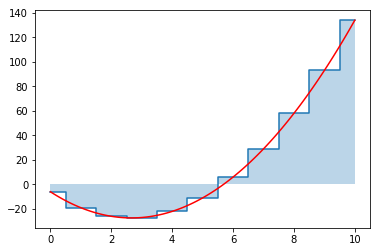

In [11]:
X = np.arange(11) # np.linspace(0,10,11)
Y = fd_lam(X)
Xd = np.arange(0, 10.1, 0.1) # np.linspace(0,10,101)
Yd = fd_lam(Xd)

plt.fill_between(X,Y, step="mid", alpha=0.3)
plt.plot(X,Y, drawstyle="steps-mid")
plt.plot(Xd, Yd,color="r")
plt.show()

棒グラフの面積を端$x=0$から順番に足していき，それをプロットする．これは$f(x)$の変化量の累積を示すグラフである．
$$F(x)=\sum_{i=0}^x f'(i)*1$$

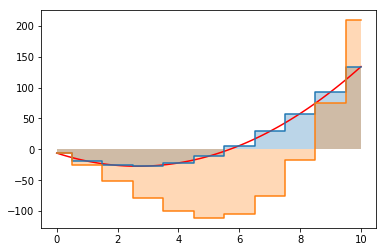

In [12]:
X = np.arange(11) # np.linspace(0,10,11)
Y1 = fd_lam(X)
Y2 = Y1.cumsum()
Xd = np.arange(0, 10.1, 0.1) # np.linspace(0,10,101)
Yd = fd_lam(Xd)

plt.plot(Xd, Yd, color = "red")
plt.fill_between(X,Y1, step="mid", alpha=0.3)
plt.plot(X,Y1, drawstyle="steps-mid")
plt.fill_between(X,Y2, step="mid", alpha=0.3)
plt.plot(X,Y2, drawstyle="steps-mid")
plt.show()

棒グラフの幅$d$を小さくすればするほど面積の測定は正確になる．

In [13]:
Xd = np.arange(0, 10.1, 0.1)
Yd = fd_lam(Xd)

@interact(h=(0.1,1,0.1) )
def deriv(h = 1):
    X = np.arange(0,10 + h,h)
    Y1 = fd_lam(X)
    Y2 = Y1.cumsum()*h

    plt.plot(Xd, Yd, color = "red")
    plt.fill_between(X,Y1, step="mid", alpha=0.3)
    plt.plot(X,Y1, drawstyle="steps-mid")
    plt.fill_between(X,Y2, step="mid", alpha=0.3)
    plt.plot(X,Y2, drawstyle="steps-mid")
    plt.xlim(0,10)
    plt.ylim(-120,220)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=0.1), Output()), _dom_classes=('wid…

一般に，区間$[a,b]$を分割する区間幅$h$を0に限りなく近づけたときの
$\lim_{h\to 0}\sum_i f(x_i)h (x_{i+1}=x_i+h)$は，関数$f(x)$の定積分
$$\int_a^b f(z) dz$$
である．この例で，定積分は関数$f(x)$の変化量の集積なので，定積分の下限を$a=0$，上限を$b=x$として，$f(0)$に加えると
$$f(x)=f(0)+\int_0^x f'(z)dz$$
となって，もとの関数$f(x)$を再現できる．

In [16]:
X = np.arange(0, 10.1, 0.1)
Y = f_lam(X)

@interact(h=(0.1,1,0.1) )
def deriv(h = 1):
    Xint = np.arange(0,10 + h,h)
    Yint = fd_lam(Xint)
    Y2 = f_lam(0) + Yint.cumsum()*h

    plt.plot(X, Y, color = "blue")
    plt.fill_between(Xint,Y2, step="mid", alpha=0.3)
    plt.plot(Xint,Y2, drawstyle="steps-mid")
    plt.xlim(0,10)
    plt.ylim(0,300)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=0.1), Output()), _dom_classes=('wid…

上手にできたね！